# Research on car sales ads

As an Analyst, my task is to examine a few years data, and figure out which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



try:
    df=pd.read_csv('vehicles_us.csv')
except:
    df=pd.read_csv('/datasets/vehicles_us.csv')

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

I can see that there are quite a lot of missing values, which I'll have to see how I handle.

## Data preprocessing

### Data Check-ups

#### Duplicates

In [4]:
num_of_duplicate=df.duplicated().sum()
print('Number of duplicates in the dataset: {}'.format(num_of_duplicate))

Number of duplicates in the dataset: 0


#### Bad values treatment

Found some issues with the cars year model, and I treated it as part of missing values treatment

###### fuel

I checked and saw that all cars (6 in total) that the publishers defined as electric were cars that cunsume petrol, so I changed it to gas.

In [5]:
df.loc[df['fuel']=='electric','fuel']='gas'

#### Missing Values

##### Missing Values that can be filled

###### is_4wd

The is_4wd column have 2 values: 1 and empty cells. The empty cells mean that this is not a 4WD car. I'll fill it with 0.

In [6]:
df['is_4wd']=df['is_4wd'].fillna('0')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


###### cylinders

The number of cylinders can be filled by the approach that number of cylinders are probably the same for the same model and year of production. So i found the median for each group of model and year of production

In [7]:
pct_missing_values_cylinders=len(df[df['cylinders'].isnull()==True])/len(df)
print('The Percent of missing values in cylinders column is {:.2%}'.format(pct_missing_values_cylinders))

df['cylinders'] = df['cylinders'].fillna(df.groupby(['model','model_year'])['cylinders'].transform('median'))

pct_missing_values_cylinders=len(df[df['cylinders'].isnull()==True])/len(df)
print('The Percent of missing values in cylinders column after filling na is {:.2%}'.format(pct_missing_values_cylinders))

The Percent of missing values in cylinders column is 10.21%
The Percent of missing values in cylinders column after filling na is 0.75%


The transform handled most of the NAs, but there are still some, which I'll fill with 0.<br>There are still some missing values after the transform operation, since the model_year has missing values. That group is not treated by the transform function.

In [8]:
df['cylinders']=df['cylinders'].fillna(0)

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

##### Missing Values that can't be filled

###### paint_color

In [9]:
pct_missing_values_paint_color=len(df[df['paint_color'].isnull()==True])/len(df)
print('The Percent of missing values in paint_color column is {:.2%}'.format(pct_missing_values_paint_color))
df['paint_color']=df['paint_color'].fillna('other')

The Percent of missing values in paint_color column is 17.99%


In [10]:
pct_missing_values_model_year=len(df[df['model_year'].isnull()==True])/len(df)
print('The Percent of missing values in model_year column is {:.2%}'.format(pct_missing_values_model_year))

The Percent of missing values in model_year column is 7.02%


In [11]:
df.isna().mean().reset_index()

,index,0
0,price,0.000000
1,model_year,0.070238
2,model,0.000000
3,condition,0.000000
4,cylinders,0.000000
5,fuel,0.000000
6,odometer,0.153168
7,transmission,0.000000
8,type,0.000000
9,paint_color,0.000000


###### model_year

Looking at the model_year column, I see that there are cars that are too old. I'll see how many cars are older than 1970.

In [12]:
df.sort_values('model_year').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0,2018-06-24,25
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0,2018-07-06,34
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0,2018-11-18,59
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0,2018-11-22,10
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0,2019-01-18,24


In [13]:
cars_older_1970=len(df.query('1970>model_year'))
pct_old_cars=cars_older_1970/len(df)
print('The number of cars which are older than 1970: {}'.format(cars_older_1970))
print('The percentage of old cars from the whole dataset: {:.2%}'.format(pct_old_cars))

The number of cars which are older than 1970: 93
The percentage of old cars from the whole dataset: 0.18%


I checked some old records manualy, and those car were probably new cars, so I'll treat them as missing values.
<br>The oldest year in the dataset is 1908, so I'll fill all the empty values with that year.

In [14]:
pct_missing_values_model_year=len(df[df['model_year'].isnull()==True])/len(df)
print('The Percent of missing values in model_year column is {:.2%}'.format(pct_missing_values_model_year))
df['model_year']=df['model_year'].fillna(1908)

The Percent of missing values in model_year column is 7.02%


###### odometer

In [15]:
pct_missing_values_odometer=len(df[df['odometer'].isnull()==True])/len(df)
print('The Percent of missing values in odometer column is {:.2%}'.format(pct_missing_values_odometer))
df['odometer']=df['odometer'].fillna(0)

The Percent of missing values in odometer column is 15.32%


#### Type conversion

##### Convert date_posted datatype to date

Later I have to use all kind of date manipulation. Since the date_posted column is defined as object, I'll convert it to date.

In [16]:
df['date_posted']=pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [17]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1,2018-06-23,19
1,25500,1908.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,0.0,automatic,pickup,other,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


##### Convert cylinders and model_year datatype to int

Converting to int so that it will look better

In [18]:
df['cylinders']=df['cylinders'].astype('int')
df['model_year']=df['model_year'].astype('int')

### Conclusion

People sometimes like to leave some of the details out of the ad, so that they'll have the chance of persuading the buyer over the phone that it is a good deal although...

## Make calculations and add them to the table

### Add columns

#### Day of Week

In [19]:
all_days={0: 'monday', 1: 'tuesday', 2: 'wednsday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}
def set_week_day_name(day_num):
    day_name=all_days.get(day_num)
    return day_name

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1,2018-06-23,19
1,25500,1908,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,0.0,automatic,pickup,other,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


In [20]:
df['day_of_week']=df['date_posted'].dt.weekday
df['day_of_week']=df['day_of_week'].apply(set_week_day_name)

#### Vehicle age

In [21]:
now = datetime.datetime.now()
cur_year=now.year

def get_vehicle_age(vcl_year):
    try:
        return cur_year-vcl_year
    except:
        return ''

In [22]:
df['vehicle_age']=df['model_year'].apply(get_vehicle_age)

#### Average mileage per year

In [23]:
df['avg_miles_year']=(df['odometer']/df['vehicle_age']).astype('int')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,vehicle_age,avg_miles_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1,2018-06-23,19,saturday,10,14500
1,25500,1908,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,friday,113,785
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,thursday,8,13750
3,1500,2003,ford f-150,fair,8,gas,0.0,automatic,pickup,other,0,2019-03-22,9,friday,18,0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,tuesday,4,20225


### Change condition columninto a numeric scale

One of the requirements is to change the condition column into a numeric scale.

In [24]:
condition_scale={'salvage ': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new': 4, 'new': 5}
def condition_into_num_scale(cond):
    return condition_scale.get(cond, -1)
    
df['condition'] = df['condition'].apply(condition_into_num_scale)

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,vehicle_age,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,1,2018-06-23,19,saturday,10,14500
1,25500,1908,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,friday,113,785
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,thursday,8,13750
3,1500,2003,ford f-150,1,8,gas,0.0,automatic,pickup,other,0,2019-03-22,9,friday,18,0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,tuesday,4,20225


## Carry out exploratory data analysis

In [60]:
def histographByColumn(dataset, col_name):
    dataset.hist(col_name, bins=40);
    plt.plot();    

### Price

Number of ads with price tag above 50,000 is 227, which is 0.44% of all the ads


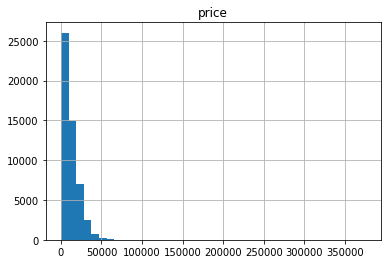

In [61]:
histographByColumn(df, 'price')

num_above_50k=df.query('price>50000')['price'].count()

print('Number of ads with price tag above 50,000 is {}, which is {:.2%} of all the ads'
     .format(num_above_50k,num_above_50k/len(df)))

Number of ads with price tag above 50,000 is 227, which is 0.44% of all the ads


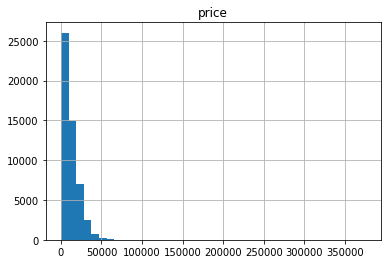

In [62]:
histographByColumn(df, 'price')

num_above_50k=df.query('price>50000')['price'].count()

print('Number of ads with price tag above 50,000 is {}, which is {:.2%} of all the ads'
     .format(num_above_50k,num_above_50k/len(df)));

Since ads above 50,000$ are outliers, I'll take those ads out.

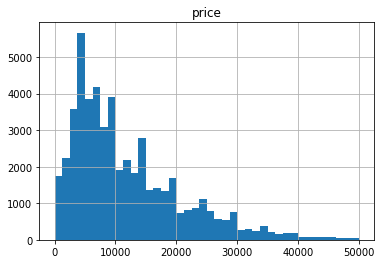

In [64]:
df_good_data=df.query('price<50000')
histographByColumn(df_good_data, 'price')

### vehicle_age

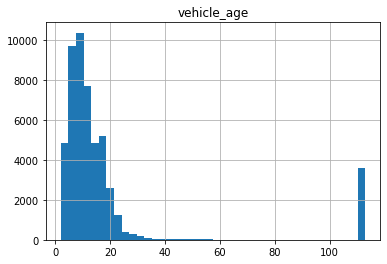

In [65]:
histographByColumn(df_good_data, 'vehicle_age')

After looking at the histogram, I can see that cars that are older than 50 years are outliers, so I'm taking them out as well.

In [29]:
num_above_age_40=df_good_data.query('vehicle_age>40')['vehicle_age'].count()

print('Number of ads with cars which age is above 40 years is {}, which is {:.2%} of all the ads'.format(num_above_age_40, num_above_age_40/len(df)))

Number of ads with cars which age is above 40 years is 3802, which is 7.38% of all the ads


The percentage looks high, but part of it is the missing values, which I filled with the year 1908, like the oldest car in the dataset. The percentage of missing cars was 7.02%, and if I'll take it off:<br>
7.38%-7.02%=0.36%<br>
This means that there are 0.36% of outliers, which is a small portion of the dataset.

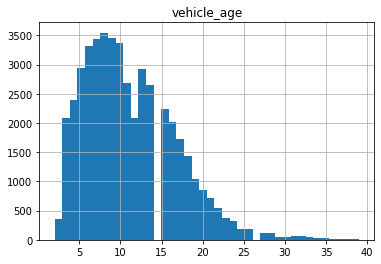

In [66]:
df_good_data=df_good_data.query('vehicle_age<40')
histographByColumn(df_good_data, 'vehicle_age')

### odometer

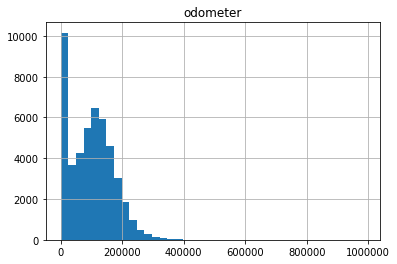

In [31]:
histographByColumn(df_good_data, 'odometer')

Seeing this histogram, I understood that mileage above 400,000 miles, is an outlier.

In [32]:
num_above_400k_miles=df_good_data.query('odometer>400000')['odometer'].count()

print('Number of ads with cars which mileage is above 400,000 is {}, which is {:.2%} of all the ads'.format(num_above_400k_miles, num_above_400k_miles/len(df)))

Number of ads with cars which mileage is above 400,000 is 44, which is 0.09% of all the ads


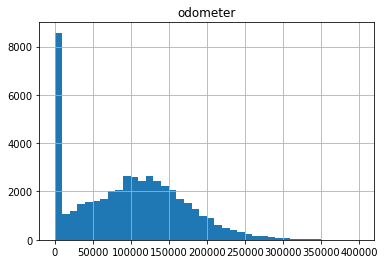

In [67]:
df_good_data=df_good_data.query('odometer<400000')
histographByColumn(df_good_data, 'odometer')

The new histogram shows me that I still have outliers. The mileage should be up to 350,000.<br>
I can see a large group of ads for cars with 0 mileage, which can be OK since they might be new cars, but since it might be that it was a filler for missing values, I'll remove cars with 0 miles on the odometer.

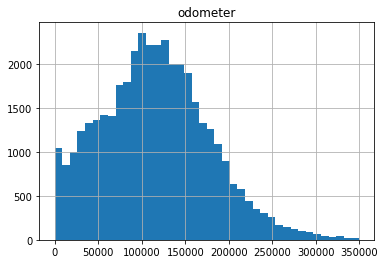

In [68]:
df_good_data=df_good_data.query('0<odometer<350000')
histographByColumn(df_good_data, 'odometer')

### cylinders

In [35]:
df_good_data['cylinders'].value_counts()

6     13632
8     13532
4     12021
10      448
5       247
3        29
0        13
7        11
12        1
9         1
Name: cylinders, dtype: int64

Taking the outliers out, I'll keep only ads with more than 100 ads per group

In [36]:
df_good_data=df_good_data.query('cylinders in (4,6,8,5,10)')
df_good_data['cylinders'].value_counts()

6     13632
8     13532
4     12021
10      448
5       247
Name: cylinders, dtype: int64

### condition

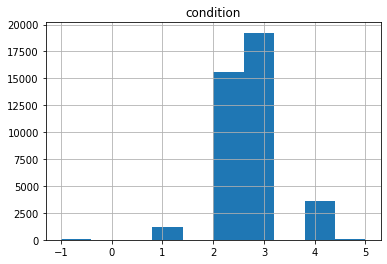

In [37]:
df_good_data.hist('condition')
plt.plot();

The -1 is a filler for a missing value. The 0, 5 have very low numbers of ads, and I'll treat them as outliers.

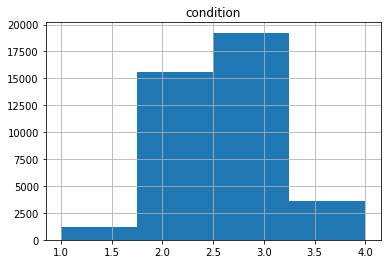

In [38]:
df_good_data=df_good_data.query('0<condition<5')
df_good_data.hist('condition', bins=4)
plt.plot();

### days_listed

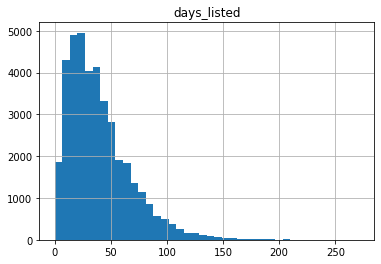

In [69]:
histographByColumn(df_good_data, 'days_listed')

From the histogram I see that most cars are sold within 50 days from the moment that they were published.

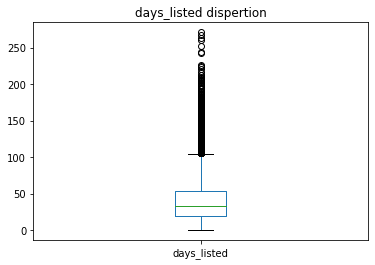

In [73]:
df_good_data['days_listed'].plot(kind='box', title='days_listed dispertion')
plt.plot();

From the box plot, it's even easier to see that 

In [41]:
df_good_data['days_listed'].describe()

count    39705.000000
mean        39.652613
std         28.140057
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [42]:
listed_mean=df_good_data['days_listed'].mean()
listed_median=df_good_data['days_listed'].median()
print('The listed_mean mean is: {:.2f}, and median is: {:0.0f}'.format(listed_mean,listed_median))

The listed_mean mean is: 39.65, and median is: 33


In [43]:
pct_cars_sold_50_days=df_good_data.query('days_listed<=50')['days_listed'].count()
print('Percent of cars in the dataset up to 50 days of publish: {:.2%}'.format(pct_cars_sold_50_days/len(df_good_data)))

num_cars_sold_100_days=df_good_data.query('50<days_listed<=100')['days_listed'].count()
print('Percent of cars in the dataset in the next 50 days of publish(days between 51-100): {:.2%}'.format(num_cars_sold_100_days/len(df_good_data)))

num_cars_sold_after_100_days=df_good_data.query('days_listed>100')['days_listed'].count()
print('Percent of cars in the dataset for more than 100 days of publish(days > 100): {:.2%}'.format(num_cars_sold_after_100_days/len(df_good_data)))

Percent of cars in the dataset up to 50 days of publish: 72.09%
Percent of cars in the dataset in the next 50 days of publish(days between 51-100): 24.18%
Percent of cars in the dataset for more than 100 days of publish(days > 100): 3.73%


Most cars are sold within 50 days from the moment that they were published. But there are cars that are not attractive, or that the seller wouldn't settle.

### All histograms

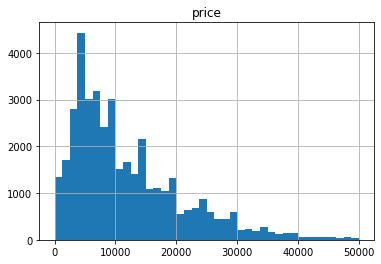

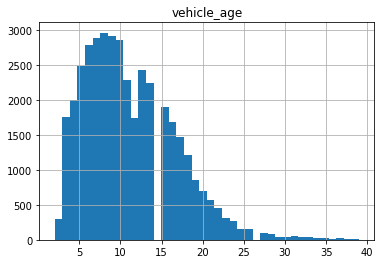

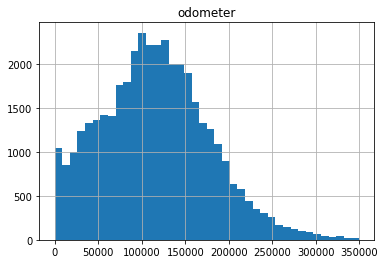

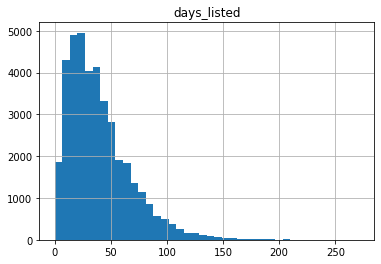

In [71]:
cols=['price', 'vehicle_age', 'odometer', 'days_listed']
for col in cols:
    histographByColumn(df_good_data, col)

### type

In [44]:
df_good_data['type'].value_counts()

SUV            9624
truck          9543
sedan          9371
pickup         5347
coupe          1700
wagon          1192
mini-van        918
hatchback       831
van             461
convertible     323
other           196
offroad         176
bus              23
Name: type, dtype: int64

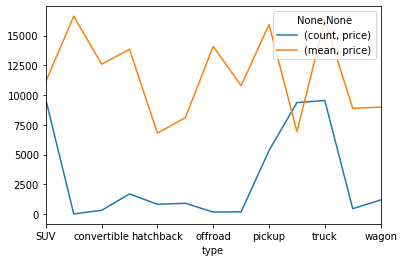

In [45]:
pvt=df_good_data.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
pvt.plot();

The 2 types with most of the ads per type are SUV and truck.

In [46]:
df_suv=df_good_data.query('type=="SUV"')
df_truck=df_good_data.query('type=="truck"')

#### truck

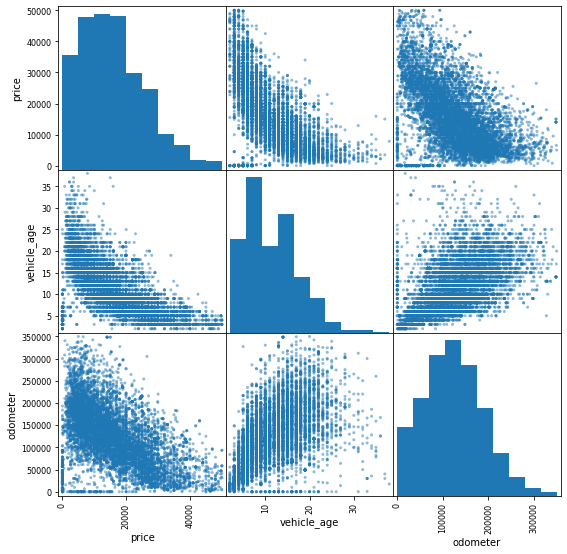

In [47]:
df_truck_correlation_params=df_truck[['price','vehicle_age','odometer','transmission','paint_color']]
pd.plotting.scatter_matrix(df_truck_correlation_params, figsize=(9, 9));

From the graph it's easy to see that there is a strong corellation between age and price. The older the car, the lower the price. There is another corellation between the price and the mileage of the car (odometer column).

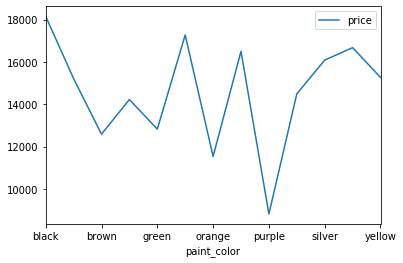

In [48]:
pvt=df_truck.pivot_table(index='paint_color', values='price')
pvt.plot();

There is an influence of the color on the price, for example, a pink color causes the car's price to drop relatively to black for example.

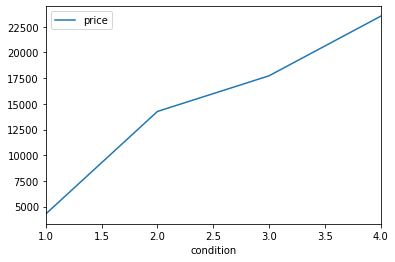

In [49]:
pvt=df_truck.pivot_table(index='condition', values='price')
pvt.plot();

Nice correlation between condition and price.

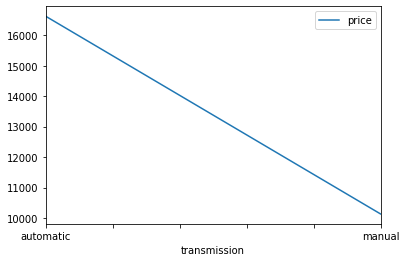

In [50]:
pvt=df_truck.query('transmission!="other"').pivot_table(index='transmission', values='price')
pvt.plot();

After removing the missing data filler (other), there is a strong correlation between transmition type to price.

#### SUV

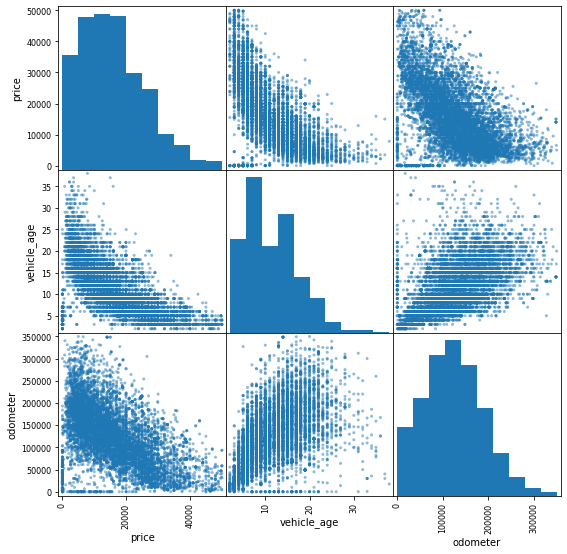

In [51]:
df_suv_correlation_params=df_truck[['price','vehicle_age','odometer','transmission','paint_color']]
pd.plotting.scatter_matrix(df_suv_correlation_params, figsize=(9, 9));

From the graph it's easy to see that there is a strong corellation between age and price. The older the car, the lower the price. There is another corellation between the price and the mileage of the car (odometer column).

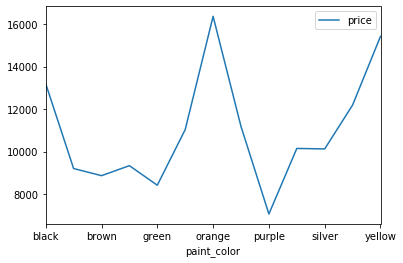

In [52]:
pvt=df_suv.pivot_table(index='paint_color', values='price')
pvt.plot();

In [53]:
# pvt=df_suv.pivot_table(index='condition', values='price')
# sb.jointplot(x=df_suv_correlation_params['condition'],y=df_suv_correlation_params['price'],kind='kde')

There is an influence of the color on the price, for example, a pink color causes the car's price to drop relatively to orange for example.

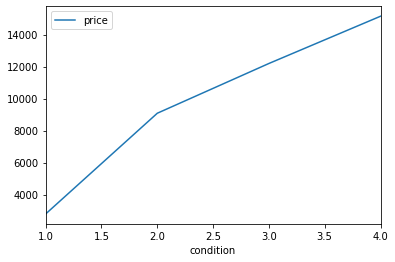

In [54]:
pvt=df_suv.pivot_table(index='condition', values='price')
pvt.plot();

Nice correlation between condition and price.

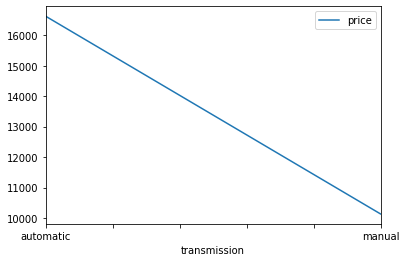

In [55]:
pvt=df_truck.query('transmission!="other"').pivot_table(index='transmission', values='price')
pvt.plot();

After removing the missing data filler (other), there is a strong correlation between transmition type to price.

## Overall conclusion

There are many parameters that are influencing the price of the car. Since humans are creating the ads, there are many cases of mistakes and missing values.

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn